In [25]:
import os

folder_path = r"C:\Users\saket\Downloads\maternal_care-main\maternal_care-main"

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\fetal_health.csv
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\LICENSE
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\main.py
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\Maternal Health Risk Data Set.csv
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\README.md
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\requirements.txt
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\codebase\dashboard_graphs.py
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\codebase\__pycache__\dashboard_graphs.cpython-312.pyc
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\graphics\about us.png
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\graphics\dashboard.png
C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\graphics\fetal_health_image.jpg
C:\Users\saket\Downloads\maternal_care-main\maternal_

✅ Data Loaded: 2126 rows × 22 columns

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-nul

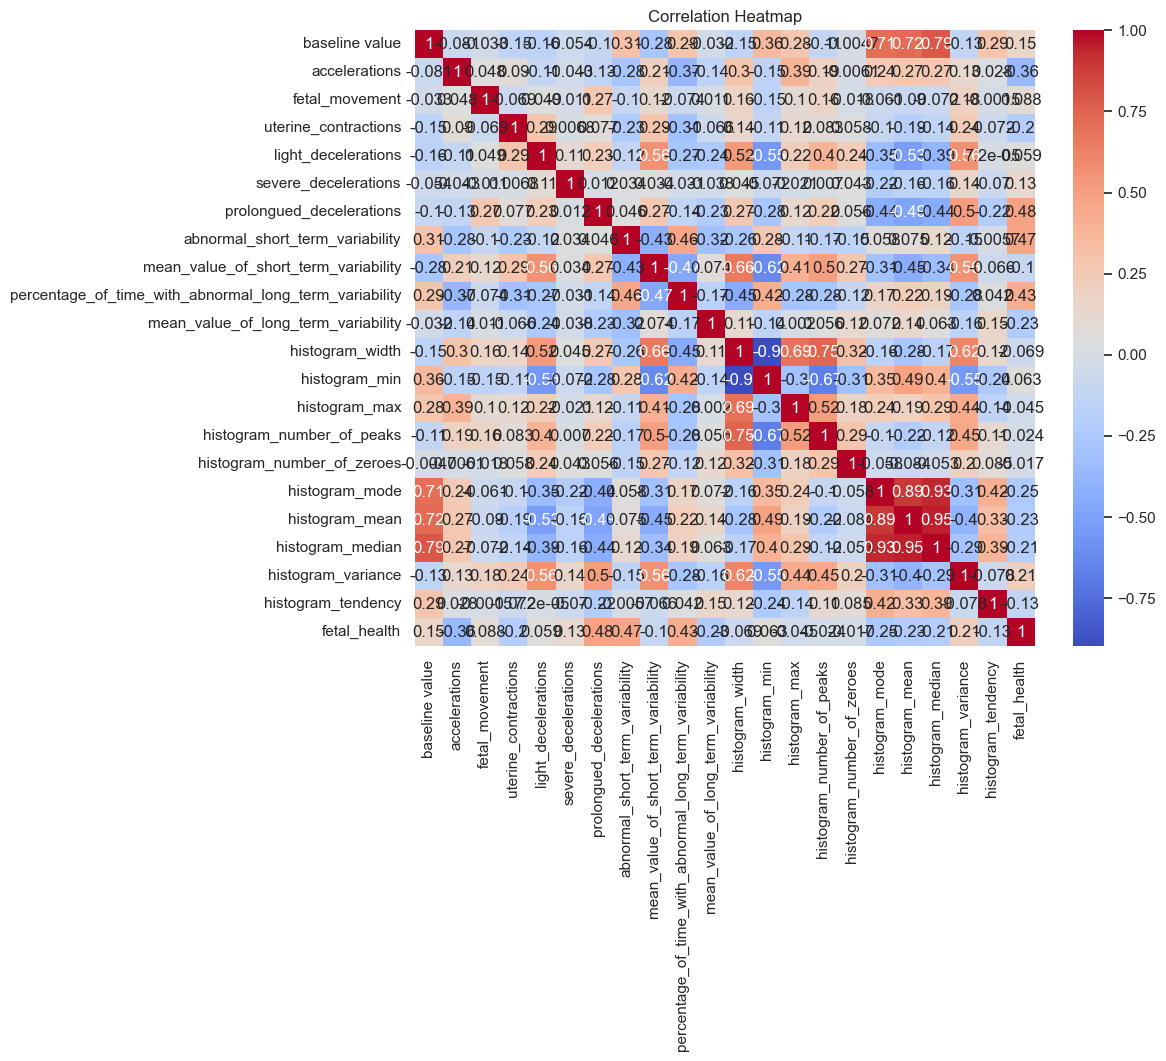

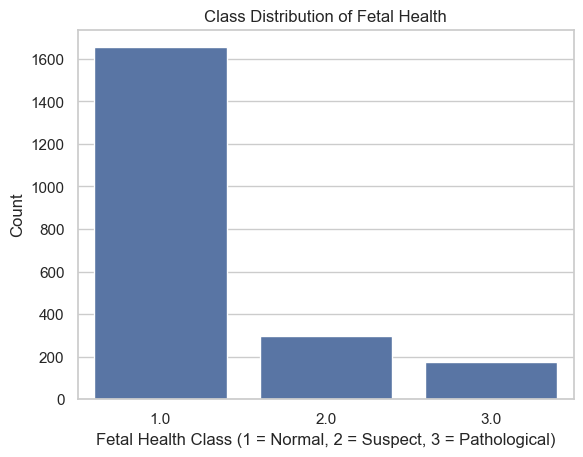

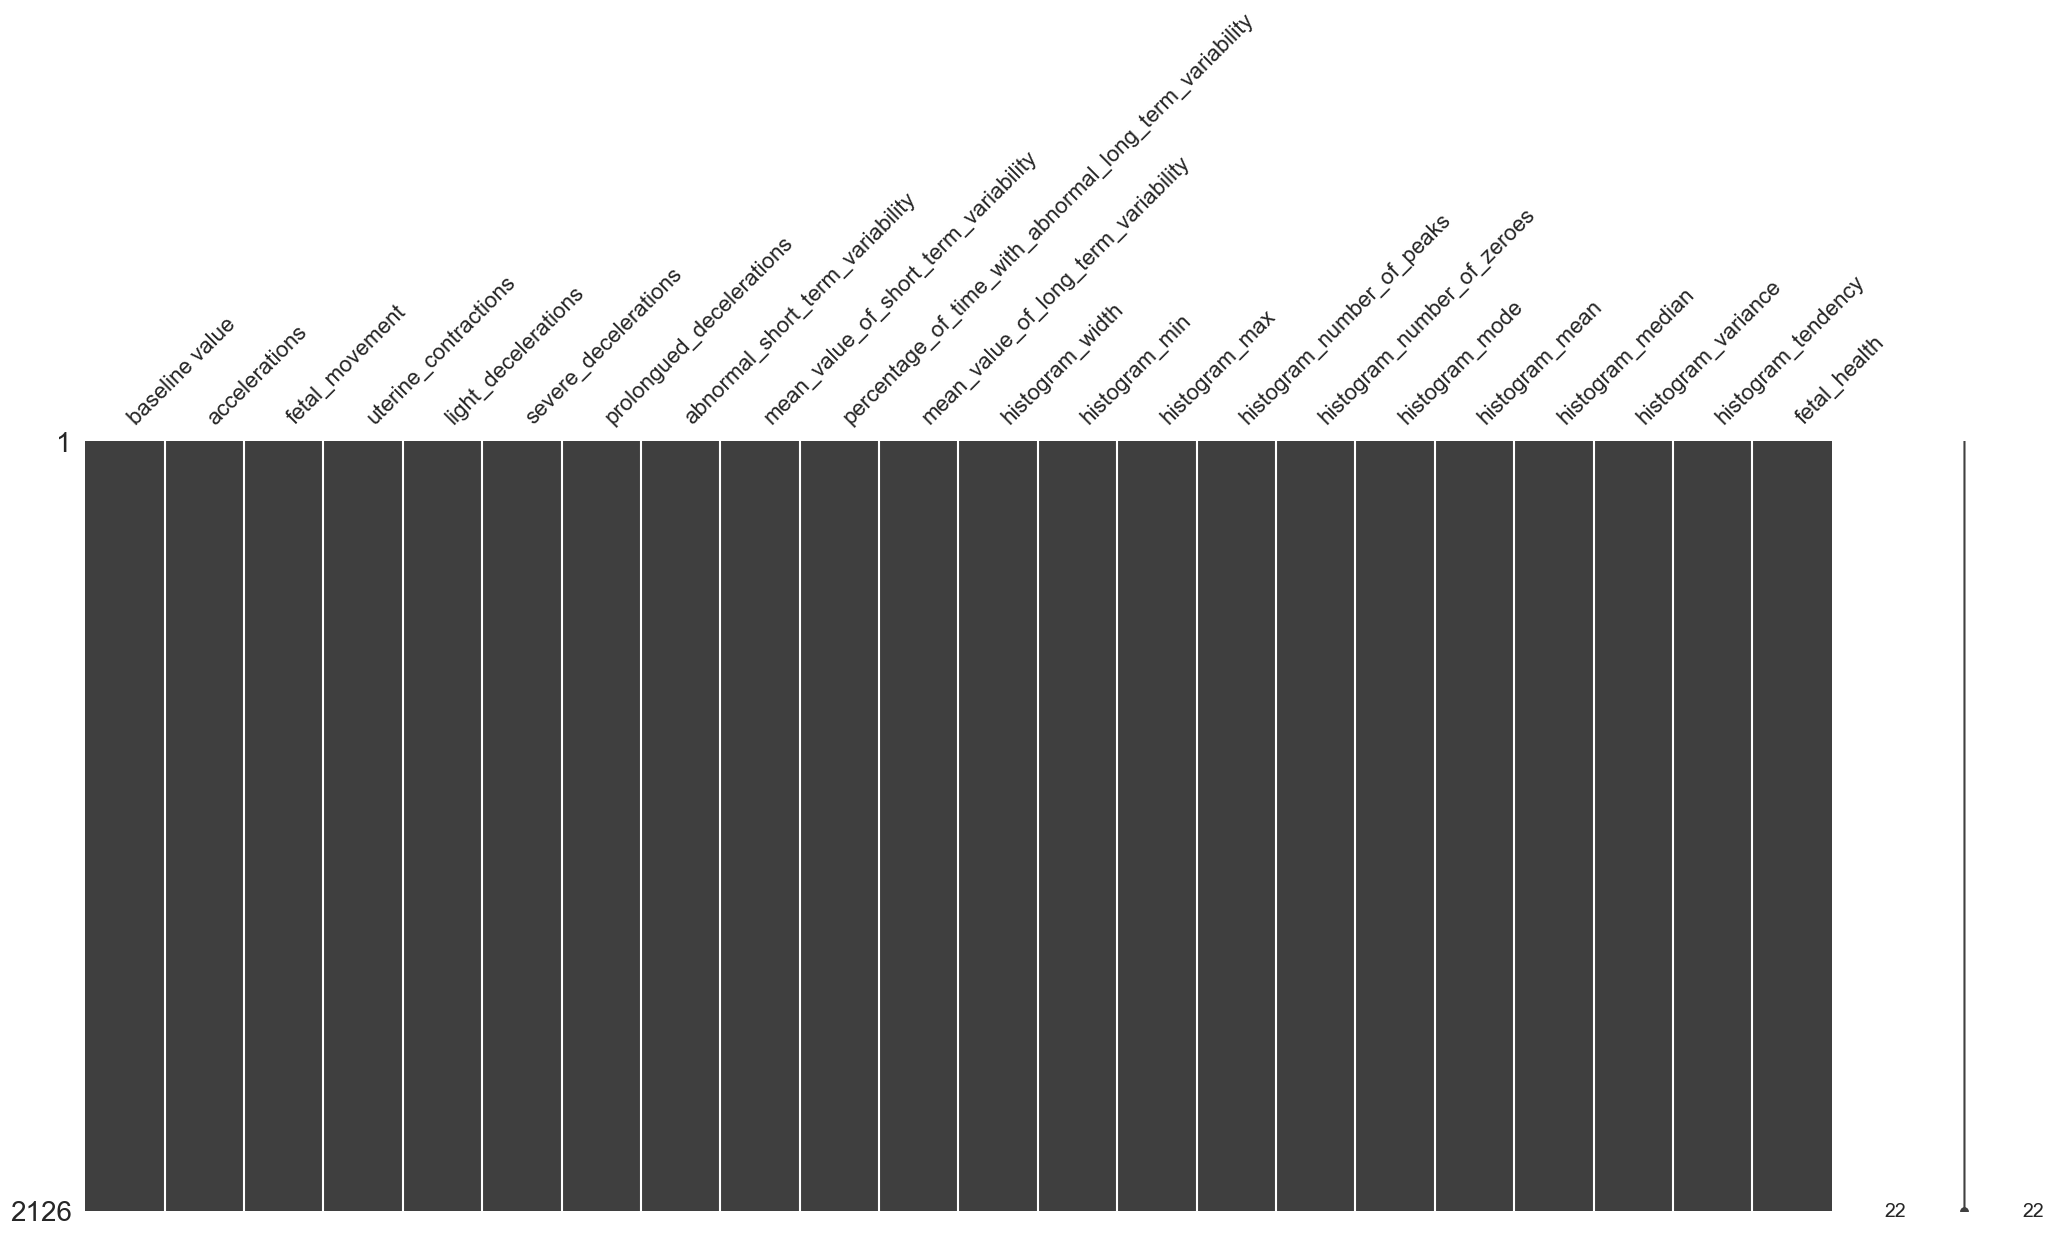

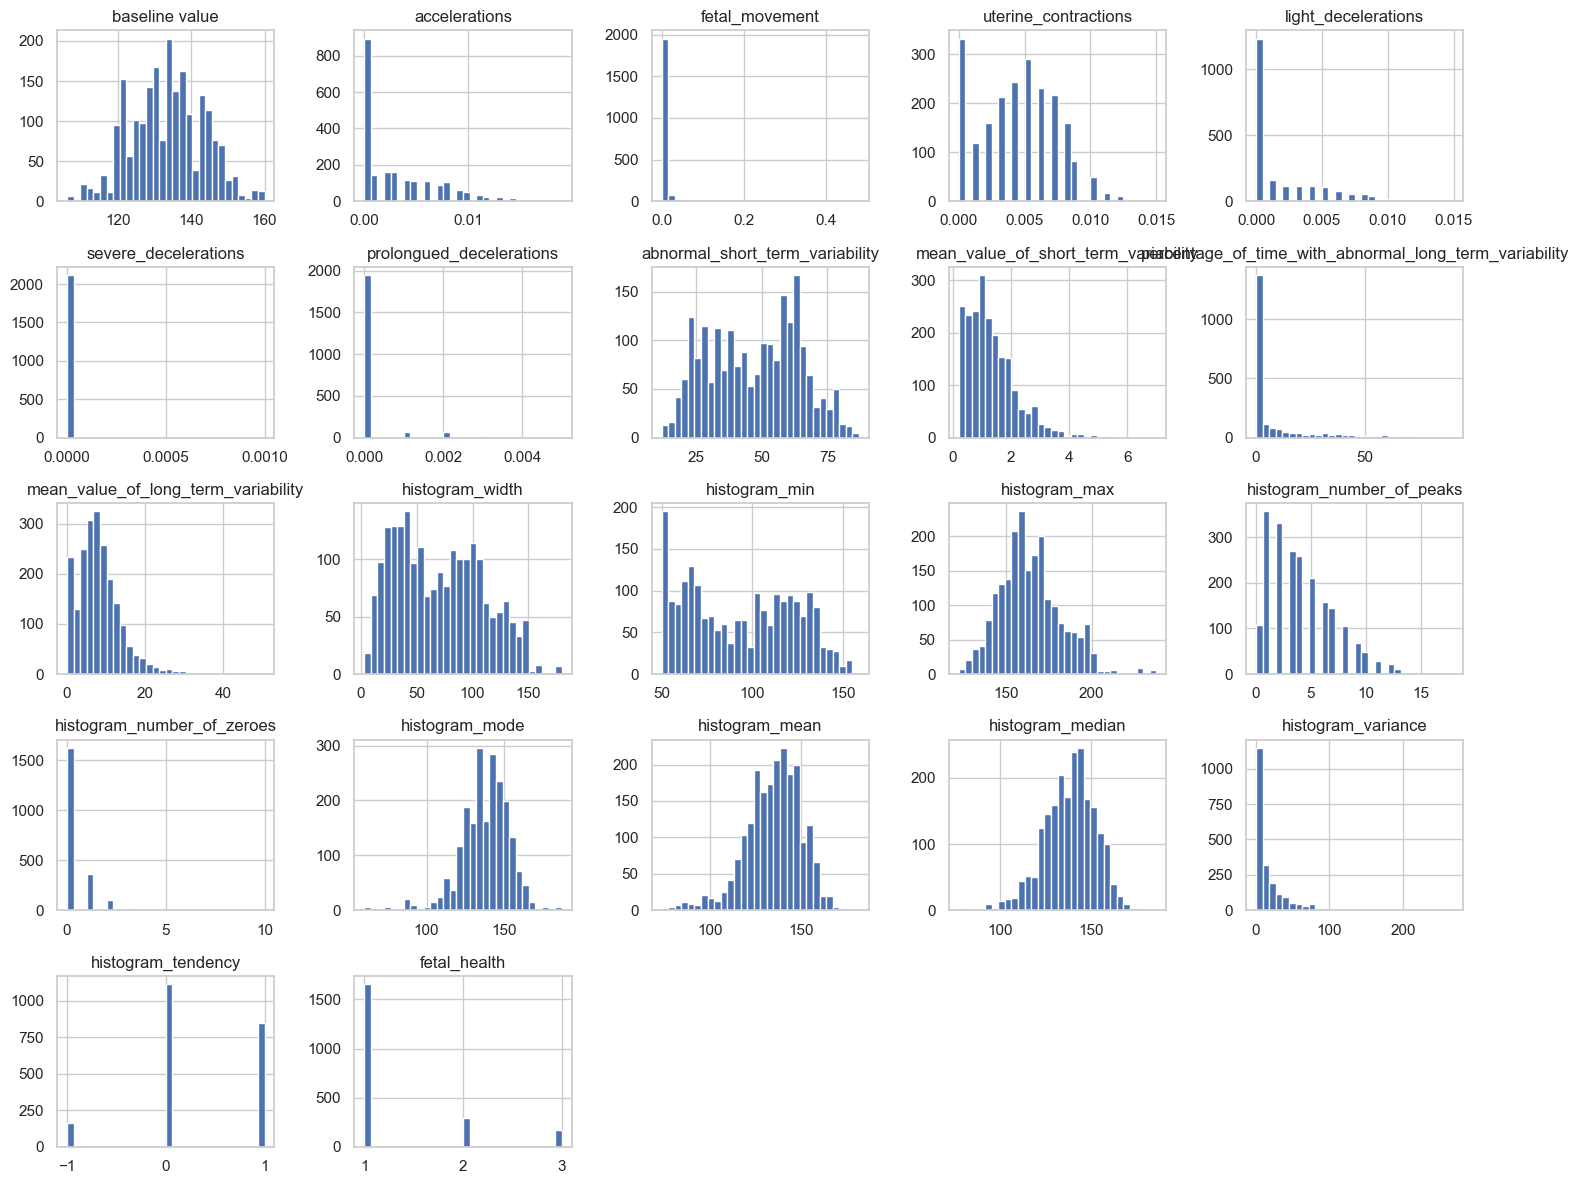


🔍 Logistic Regression Accuracy: 0.8850
[[314  17   1]
 [ 17  40   2]
 [  3   9  23]]
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.61      0.68      0.64        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426


🔍 K-Nearest Neighbors Accuracy: 0.8709
[[320  11   1]
 [ 29  28   2]
 [  5   7  23]]
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93       332
         2.0       0.61      0.47      0.53        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.87       426
   macro avg       0.80      0.70      0.74       426
weighted avg       0.86      0.87      0.86       426


🔍 Random Forest Accuracy: 0.9343
[[326   5   1]
 [ 15  42   2]
 [

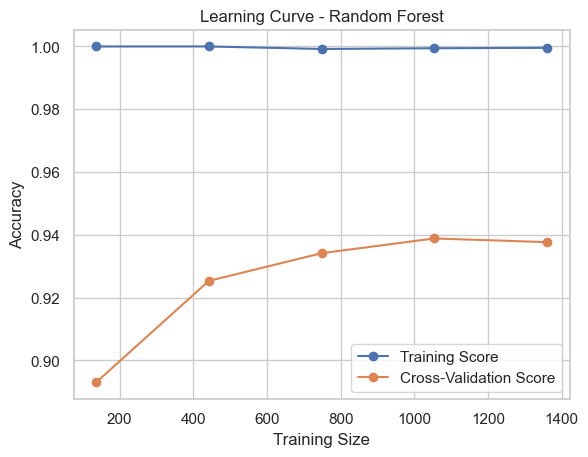

In [26]:
# ==== STEP 1: Imports ====
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# ==== STEP 2: Load Dataset ====
file_path = r"C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\fetal_health.csv"
df = pd.read_csv(file_path)
print(f"✅ Data Loaded: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

# ==== STEP 3: Data Overview ====
print("\n📋 Dataset Info:")
print(df.info())

print("\n🔍 Missing Values:")
print(df.isnull().sum())

print("\n📊 Class Distribution:")
print(df['fetal_health'].value_counts())

# ==== STEP 4: Visualizations ====

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Class Distribution Plot
sns.countplot(x='fetal_health', data=df)
plt.title("Class Distribution of Fetal Health")
plt.xlabel("Fetal Health Class (1 = Normal, 2 = Suspect, 3 = Pathological)")
plt.ylabel("Count")
plt.show()

# Missing Values Matrix
msno.matrix(df)
plt.show()

# Distribution of Numeric Features
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

# ==== STEP 5: Feature and Target Split ====
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# ==== STEP 6: Train-Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ==== STEP 7: Feature Scaling ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== STEP 8: Model Training & Evaluation ====
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔍 {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# ==== STEP 9: Learning Curve (Optional) ====
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Learning Curve for the best model (e.g., Random Forest)
plot_learning_curve(RandomForestClassifier(), "Learning Curve - Random Forest", X_train_scaled, y_train)


In [27]:
# Load Dataset
data = pd.read_csv(r"C:\Users\saket\Downloads\maternal_care-main\maternal_care-main\fetal_health.csv")

In [28]:
# Assuming you loaded the data into df
from sklearn.preprocessing import StandardScaler
import pandas as pd

columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

# Make sure you're using the correct DataFrame
# Replace `data` with `df` if that's the correct one
assert 'fetal_health' in df.columns, "fetal_health column not found!"

scale_X = StandardScaler()
X_scaled = pd.DataFrame(
    scale_X.fit_transform(df.drop(["fetal_health"], axis=1)),
    columns=columns
)


In [29]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [30]:
y = data["fetal_health"]

In [31]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score


Gradient Boosting classifier (GBC)

In [34]:
# Initialize and train the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score for multiclass

# Calculate AUC for multiclass
y_scores = gb_classifier.predict_proba(X_test)
auc = roc_auc_score(y_test, y_scores, average='weighted', multi_class='ovr')

# Calculate specificity for the entire multiclass problem
confusion = confusion_matrix(y_test, y_pred)
true_negatives = np.sum(np.diag(confusion))
false_positives = np.sum(confusion) - true_negatives
specificity = true_negatives / (true_negatives + false_positives)

# Print the evaluation metrics, AUC, and specificity
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
AUC: 0.97
Specificity: 0.93


In [35]:
import pickle

In [36]:
pickle.dump(gb_classifier, open('fetal_health_classifier.sav', 'wb'))